[[0.25      ]
 [0.33333333]
 [0.33333333]
 [0.5       ]
 [0.5       ]
 [1.        ]]
[[0.         0.25       0.         0.25       0.25       0.25      ]
 [0.         0.         0.         0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.5        0.         0.         0.5       ]
 [0.         0.         1.         0.         0.         0.        ]]
V= [0.0937 0.1172 0.2813 0.1563 0.1406 0.2109]


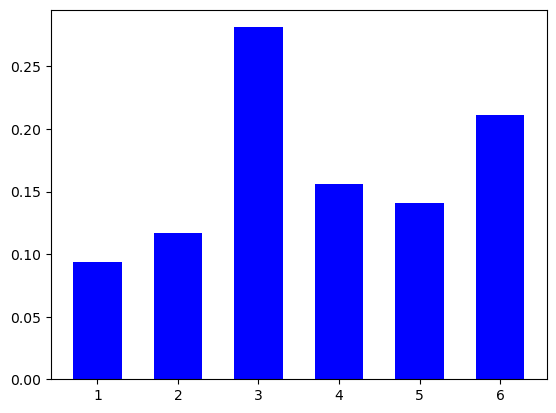

In [1]:
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt
import sympy as sp

L = [(1,2),(1,4),(1,5),(1,6),(2,4),(2,5),(2,6),(3,1),(3,2),(3,4),(4,5),(4,6),(5,3),(5,6),(6,3)]
w = np.zeros((6, 6))  # 邻接矩阵初始化
for i in range(len(L)):
    w[L[i][0]-1, L[i][1]-1] = 1
r = np.sum(w, axis=1, keepdims=True)
for i in range(len(r)):
    if r[i][0] != 0:
        r[i][0] = sp.Rational(r[i][0] ** -1)

r = np.array(r)
print(r) # 由于0不为分母，先将r成以-1方，避免相除出错。

P = w * r            # 这里利用矩阵广播
print(P)
val, vec = eigs(P.T, 1)
V = vec.real
V = V.flatten()  # 展开成（n,)形式的数组
V = V/V.sum()
print("V=", np.round(V, 4))
plt.bar(range(1, len(w)+1), V, width=0.6, color='b')
plt.show()


In [2]:
import numpy as np
from fractions import Fraction

np.set_printoptions(formatter={'all': lambda x: str(Fraction(x).limit_denominator())})  # 格式化 保留分数，不至于精度丢失
M = np.array([[0, 1 / 2, 1, 0], [1 / 3, 0, 0, 1 / 2], [1 / 3, 0, 0, 1 / 2], [1 / 3, 1 / 2, 0, 0]])  # 根据有向图得出的转移矩阵
R = np.array([1 / 4, 1 / 4, 1 / 4, 1 / 4]).reshape(4, 1)  # 初始R0

def diedai(M, R):  # 定义一个迭代函数，直至MR=R时，输出R
    count = 0
    while (True):
        R_1 = np.dot(M, R)
        if ((R_1 == R).any()):  # 判断两个数组是否相等
            print(R_1)
            print('迭代次数为：', count)
            break
        else:
            R = np.copy(R_1)
            count += 1

diedai(M, R)


[[1/3]
 [2/9]
 [2/9]
 [2/9]]
迭代次数为： 51


In [3]:
from numpy import *
a = array([[0,1,1,0],[1,0,0,1],[1,0,0,1],[1,1,0,0]],dtype=float)
#构造转移矩阵
def transPre(data):
    b = transpose(data) #把矩阵转置
    c = zeros((a.shape),dtype=float)
    #把所有的元素重新分配
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i][j] = data[i][j] / (b[j].sum())
    return c
# print(transPre(a))

def initiPre(c):
    # pr值的初始化
    pr = zeros((c.shape[0],1),dtype=float)
    for i in range(c.shape[0]):
        pr[i] = float(1)/c.shape[0]
    return pr
# print(initiPre(a))

def PageRank(p,m,v):
    #pageRank算法
    #p是网页跳转概率，m是转移矩阵，v是pr值
    while ((v == p*dot(m,v) + (1-p)*v).all() == False):
        v = p*dot(m,v) + (1-p)*v
        # print(v)
        print((v == p*dot(m,v) + (1-p)*v).all())
    return v
if __name__ == '__main__':
    M = transPre(a)
    pr = initiPre(M)
    p = 0.85
    print(PageRank(p,M,pr))


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
[[1/3]
 [2/9]
 [2/9]
 [2/9]]


In [4]:
import numpy as np
def pagerank_basic(M, tol=1e-8, max_iter=1000):
    """使用PageRank的基本定义求解PageRank值
    要求有向图是强联通且非周期性的
    :param M: 转移概率矩阵
    :param tol: 容差
    :param max_iter: 最大迭代次数
    :return: PageRank值（平稳分布）
    """
    n_components = len(M)

    # 初始状态分布：均匀分布
    pr0 = np.array([1 / n_components] * n_components)

    # 迭代寻找平稳状态
    for _ in range(max_iter):
        pr1 = np.dot(M, pr0)
        # 判断迭代更新量是否小于容差
        if np.sum(np.abs(pr0 - pr1)) < tol:
            break
        pr0 = pr1
    return pr0

if __name__ == "__main__":
    np.set_printoptions(precision=2, suppress=True)
    P = np.array([[0, 1 / 2, 1, 0],
                  [1 / 3, 0, 0, 1 / 2],
                  [1 / 3, 0, 0, 1 / 2],
                  [1 / 3, 1 / 2, 0, 0]])
    print(pagerank_basic(P))  # [0.33 0.22 0.22 0.22]


[0.33 0.22 0.22 0.22]


In [5]:

import numpy as np
def pagerank_1(M, d=0.8, tol=1e-8, max_iter=1000):
    """PageRank的迭代算法
    :param M: 转移概率矩阵
    :param d: 阻尼因子
    :param tol: 容差
    :param max_iter: 最大迭代次数
    :return: PageRank值（平稳分布）
    """
    n_components = len(M)

    # 初始状态分布：均匀分布
    pr0 = np.array([1 / n_components] * n_components)

    # 迭代寻找平稳状态
    for _ in range(max_iter):
        pr1 = d * np.dot(M, pr0) + (1 - d) / n_components

        # 判断迭代更新量是否小于容差
        if np.sum(np.abs(pr0 - pr1)) < tol:
            break
        pr0 = pr1
    return pr0
if __name__ == "__main__":
    np.set_printoptions(precision=2, suppress=True)
    P = np.array([[0, 1 / 2, 0, 0],
                  [1 / 3, 0, 0, 1 / 2],
                  [1 / 3, 0, 1, 1 / 2],
                  [1 / 3, 1 / 2, 0, 0]])
    print(pagerank_1(P))  # [0.1  0.13 0.64 0.13]


[0.1  0.13 0.64 0.13]


In [6]:
import numpy as np
def pagerank_2(M, d=0.8, tol=1e-8, max_iter=1000):
    """计算一般PageRank的幂法

    :param M: 转移概率矩阵
    :param d: 阻尼因子
    :param tol: 容差
    :param max_iter: 最大迭代次数
    :return: PageRank值（平稳分布）
    """
    n_components = len(M)

    # 选择初始向量x0：均匀分布
    x0 = np.array([1 / n_components] * n_components)
    # 计算有向图的一般转移矩阵A
    A = d * M + (1 - d) / n_components
    # 迭代并规范化结果向量
    for _ in range(max_iter):
        x1 = np.dot(A, x0)
        x1 /= np.max(x1)
        # 判断迭代更新量是否小于容差
        if np.sum(np.abs(x0 - x1)) < tol:
            break
        x0 = x1
    # 对结果进行规范化处理，使其表示概率分布
    x0 /= np.sum(x0)
    return x0

if __name__ == "__main__":
    np.set_printoptions(precision=2, suppress=True)
    P = np.array([[0, 1 / 2, 0, 0],
                  [1 / 3, 0, 0, 1 / 2],
                  [1 / 3, 0, 1, 1 / 2],
                  [1 / 3, 1 / 2, 0, 0]])
    print(pagerank_2(P))  # [0.1  0.13 0.64 0.13]


[0.1  0.13 0.64 0.13]


# 参考资料
- [PageRank 算法 python应用](https://blog.csdn.net/wuyu1876/article/details/129533652)
- [Python实现PageRank计算](https://blog.csdn.net/duan_mo_ran/article/details/114702874)
- [《统计学习方法》第21章 PageRank 算法（教材全解 + 公式推导 + Python实现）](https://blog.csdn.net/Changxing_J/article/details/118970748)
- [手把手图文并茂教你掌握 PageRank 算法](https://blog.csdn.net/weixin_40431584/article/details/105561398)